In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
tau_values = np.linspace(0.01, 30, 300)

lambda_ = 1.5

def term1(tau, lambda_):
    return (1 - np.exp(-tau / lambda_)) / (tau / lambda_)

def term2(tau, lambda_):
    return term1(tau, lambda_) - np.exp(-tau / lambda_)

term1_values = term1(tau_values, lambda_)
term2_values = term2(tau_values, lambda_)

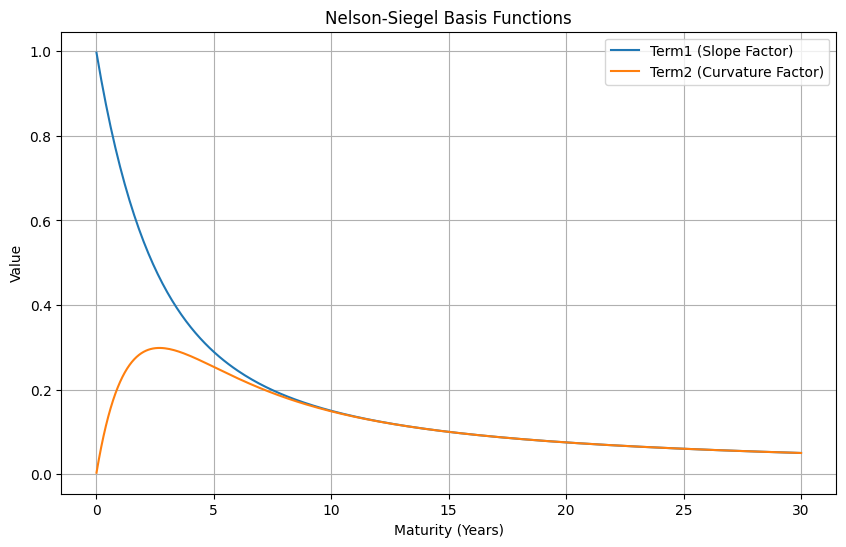

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(tau_values, term1_values, label='Term1 (Slope Factor)')
plt.plot(tau_values, term2_values, label='Term2 (Curvature Factor)')
plt.title('Nelson-Siegel Basis Functions')
plt.xlabel('Maturity (Years)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

In [4]:
corr_coef, p_value = pearsonr(term1_values, term2_values)
print(f"Correlation coefficient between Term1 and Term2: {corr_coef:.4f}")

Correlation coefficient between Term1 and Term2: 0.6178


### Simulating Data

In [5]:
np.random.seed(42)
tau_sim = np.sort(np.random.uniform(0.1, 10, 50))
term1_sim = term1(tau_sim, lambda_)
term2_sim = term2(tau_sim, lambda_)
print(tau_sim)

[0.30378649 0.44044636 0.55985909 0.67502776 0.74401077 1.06695393
 1.30817852 1.48098922 1.64434575 1.64458454 1.78818882 1.90006718
 1.91570465 1.93005911 2.07677044 2.2021572  2.66192182 2.98316849
 2.99223202 3.11199821 3.11567631 3.18593965 3.72698225 3.80794718
 4.37625568 4.45750969 4.61509284 5.00225141 5.19092094 5.24867341
 5.29508867 5.51243177 5.96490423 6.02671899 6.05103862 6.11469403
 6.15734366 6.65897062 6.87390696 7.10991852 7.34674002 7.87324202
 8.10313375 8.34118214 8.67514384 9.10227198 9.49396682 9.51207163
 9.65975713 9.70210754]


In [6]:
X_sim = np.column_stack((np.ones_like(tau_sim), term1_sim, term2_sim))

In [7]:
beta_true = np.array([2.5, -1.0, 1.5])

In [8]:
yields_sim = X_sim @ beta_true + np.random.normal(0, 0.1, size=tau_sim.shape)
print(yields_sim)

[1.80146739 1.83208869 1.87297656 1.91609704 1.83290249 2.04930062
 2.16047198 2.3645961  2.33687927 2.12627336 2.36913922 2.32236385
 2.29639273 2.42816811 2.49812391 2.50970522 2.39573579 2.48078699
 2.54562064 2.61989    2.47470474 2.50936265 2.44879639 2.44331972
 2.66226301 2.71843544 2.57865115 2.69151438 2.62899265 2.5287263
 2.62967495 2.74838483 2.59167158 2.75168271 2.33322258 2.6773134
 2.60376408 2.56369374 2.60182602 2.39269901 2.56816288 2.62258965
 2.73316829 2.53197388 2.50072121 2.52855746 2.66772198 2.60894057
 2.52214672 2.62618122]


In [9]:
corr_matrix = np.corrcoef(X_sim[:, 1:].T)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
[[1.        0.0488225]
 [0.0488225 1.       ]]


### OLS and Ridge Estimators

In [10]:
ols_reg = LinearRegression(fit_intercept=False)
ols_reg.fit(X_sim, yields_sim)
beta_ols = ols_reg.coef_

print("OLS Estimated Parameters:")
print(f"beta_0: {beta_ols[0]:.4f}")
print(f"beta_1: {beta_ols[1]:.4f}")
print(f"beta_2: {beta_ols[2]:.4f}")

OLS Estimated Parameters:
beta_0: 2.5070
beta_1: -1.0306
beta_2: 1.5213


In [11]:
alpha = 0.1
ridge_reg = Ridge(alpha=alpha, fit_intercept=False)
ridge_reg.fit(X_sim, yields_sim)
beta_ridge = ridge_reg.coef_

print("Ridge Estimated Parameters:")
print(f"beta_0: {beta_ridge[0]:.4f}")
print(f"beta_1: {beta_ridge[1]:.4f}")
print(f"beta_2: {beta_ridge[2]:.4f}")

Ridge Estimated Parameters:
beta_0: 2.5540
beta_1: -0.9402
beta_2: 1.1386


In [12]:
yields_pred_ols = ols_reg.predict(X_sim)
yields_pred_ridge = ridge_reg.predict(X_sim)

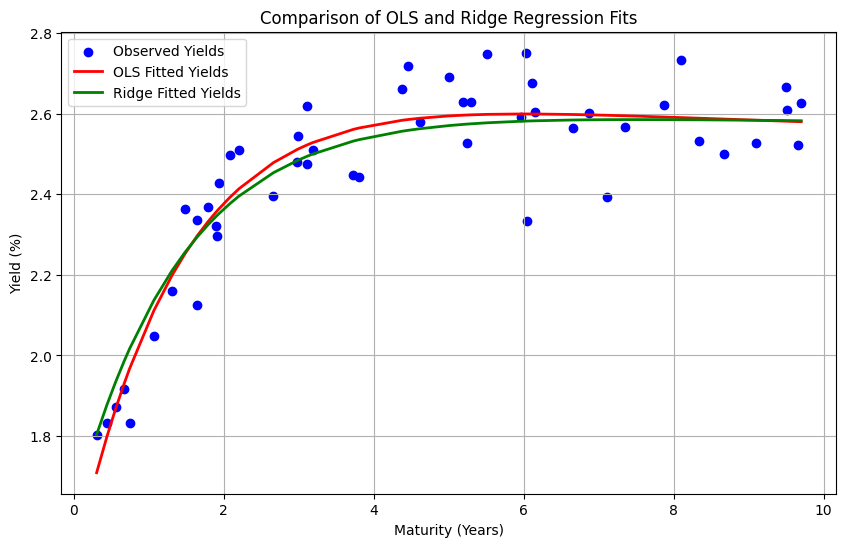

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(tau_sim, yields_sim, color='blue', label='Observed Yields')
plt.plot(tau_sim, yields_pred_ols, color='red', label='OLS Fitted Yields', linewidth=2)
plt.plot(tau_sim, yields_pred_ridge, color='green', label='Ridge Fitted Yields', linewidth=2)
plt.title('Comparison of OLS and Ridge Regression Fits')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()